<a href="https://colab.research.google.com/github/CaioPassos3/AprendizagemDeMaquina/blob/main/Lista1_AprendizagemDeM%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import gc

Questão 1.

Considere o conjunto de dados disponível em artificial1d.csv organizado em
duas colunas, x e y. Seja um modelo de regressão linear para ˆy = f(x).

a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
a reta resultante sobre os dados.

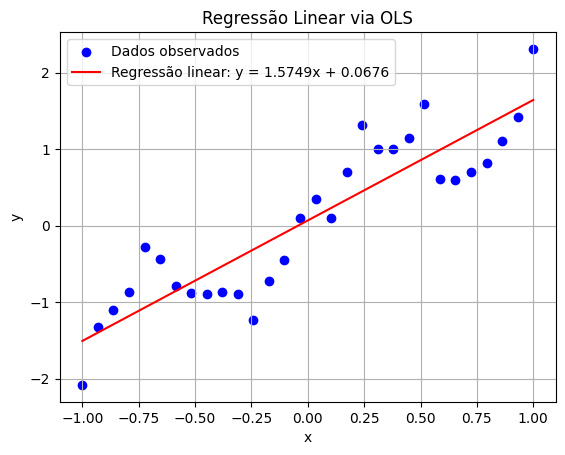

Parâmetros do modelo:
Intercept (β0): 0.067618
Slope (β1): 1.574865
MSE: 0.213401


In [3]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Adicionando coluna para o termo de interceptação
X = np.column_stack([np.ones_like(x), x])

# Calculando os parâmetros usando OLS
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extraindo os coeficientes
intercept, slope = beta

# Prevendo os valores de y
y_pred = X @ beta

# Calculando o MSE
mse = np.mean((y - y_pred) ** 2)

# Plotando os dados e a reta de regressão
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred, label=f'Regressão linear: y = {slope:.4f}x + {intercept:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via OLS')
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo os resultados
print("Parâmetros do modelo:")
print(f"Intercept (β0): {intercept:.6f}")
print(f"Slope (β1): {slope:.6f}")
print(f"MSE: {mse:.6f}")

b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante
sobre os dados.

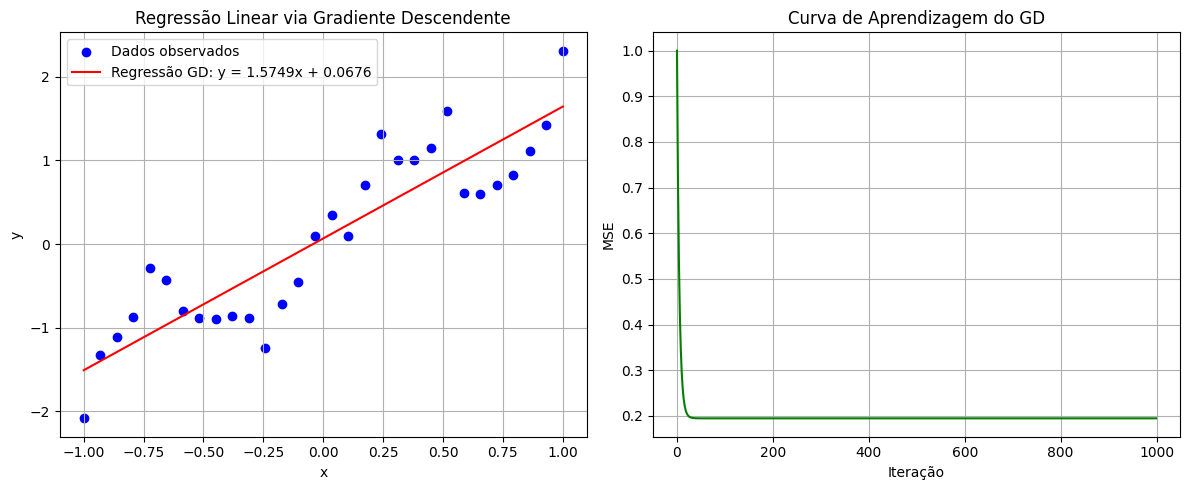

Parâmetros do modelo (GD):
Intercept (β0): 0.067618
Slope (β1): 1.574865
MSE final: 0.213401


In [4]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Normalizando os dados para melhor convergência do GD
x_normalized = (x - np.mean(x)) / np.std(x)
y_normalized = (y - np.mean(y)) / np.std(y)

# Hiperparâmetros do GD
learning_rate = 0.1
num_iterations = 1000

# Inicializando parâmetros (β0 e β1)
beta = np.zeros(2)

# Armazenando o histórico do custo (MSE)
cost_history = []

# Gradiente Descendente
for _ in range(num_iterations):
    # Predição (ŷ = β0 + β1*x)
    y_pred = beta[0] + beta[1] * x_normalized

    # Calculando o erro (MSE)
    error = y_pred - y_normalized
    mse = np.mean(error ** 2)
    cost_history.append(mse)

    # Gradientes (derivadas parciais)
    grad_beta0 = np.mean(error)
    grad_beta1 = np.mean(error * x_normalized)

    # Atualizando os parâmetros
    beta[0] -= learning_rate * grad_beta0
    beta[1] -= learning_rate * grad_beta1

# Desnormalizando os parâmetros para a escala original
beta[1] = beta[1] * (np.std(y) / np.std(x))
beta[0] = np.mean(y) - beta[1] * np.mean(x)

# Calculando y_pred final com os parâmetros desnormalizados
y_pred_final = beta[0] + beta[1] * x

# MSE final
mse_final = np.mean((y - y_pred_final) ** 2)

# Plotando os dados e a reta de regressão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred_final, label=f'Regressão GD: y = {beta[1]:.4f}x + {beta[0]:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via Gradiente Descendente')
plt.legend()
plt.grid(True)

# Plotando a curva de aprendizagem (MSE vs. iteração)
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteração')
plt.ylabel('MSE')
plt.title('Curva de Aprendizagem do GD')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados
print("Parâmetros do modelo (GD):")
print(f"Intercept (β0): {beta[0]:.6f}")
print(f"Slope (β1): {beta[1]:.6f}")
print(f"MSE final: {mse_final:.6f}")

c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

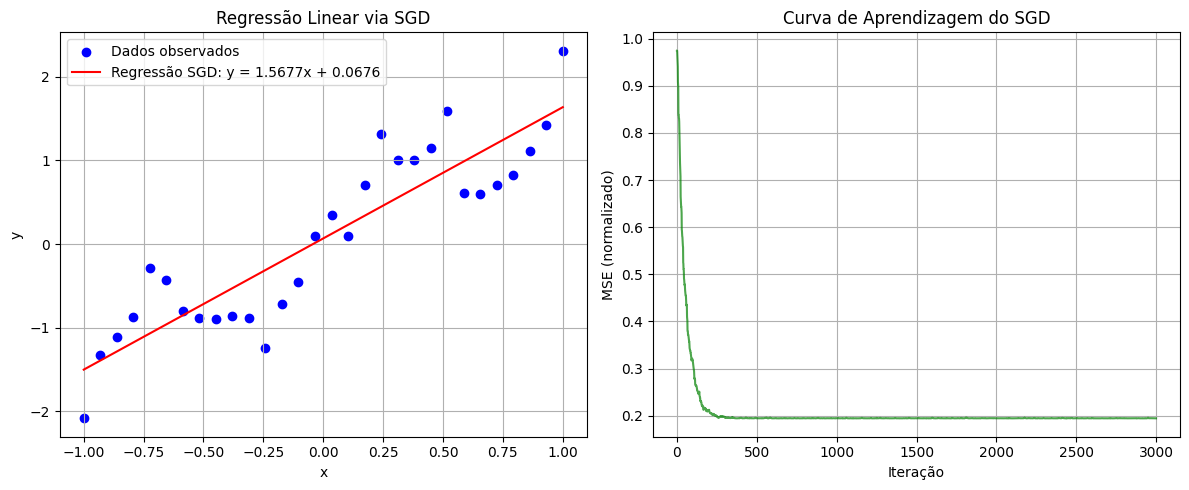

Parâmetros do modelo (SGD):
Intercept (β0): 0.067618
Slope (β1): 1.567712
MSE final: 0.213419


In [5]:
# Carregando os dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

# Normalizando os dados para melhor convergência do SGD
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)
x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

# Hiperparâmetros do SGD
learning_rate = 0.01
num_epochs = 100
batch_size = 1  # SGD usa batch_size=1 (amostra única por iteração)

# Inicializando parâmetros (β0 e β1)
beta = np.zeros(2)

# Armazenando histórico do custo (MSE)
cost_history = []

# SGD
np.random.seed(42)  # Para reprodutibilidade
n_samples = len(x)

for epoch in range(num_epochs):
    # Embaralhando os dados a cada época
    indices = np.random.permutation(n_samples)
    x_shuffled = x_normalized[indices]
    y_shuffled = y_normalized[indices]

    for i in range(n_samples):
        # Selecionando uma amostra aleatória (SGD)
        xi = x_shuffled[i]
        yi = y_shuffled[i]

        # Predição (ŷ = β0 + β1*x)
        y_pred = beta[0] + beta[1] * xi

        # Gradientes (derivadas parciais para uma amostra)
        error = y_pred - yi
        grad_beta0 = error
        grad_beta1 = error * xi

        # Atualizando os parâmetros
        beta[0] -= learning_rate * grad_beta0
        beta[1] -= learning_rate * grad_beta1

        # Calculando MSE atual
        y_pred_all = beta[0] + beta[1] * x_normalized
        mse = np.mean((y_pred_all - y_normalized) ** 2)
        cost_history.append(mse)

# Desnormalizando os parâmetros para a escala original
beta[1] = beta[1] * (y_std / x_std)
beta[0] = y_mean - beta[1] * x_mean

# Calculando y_pred final com os parâmetros desnormalizados
y_pred_final = beta[0] + beta[1] * x

# MSE final
mse_final = np.mean((y - y_pred_final) ** 2)

# Plotando os dados e a reta de regressão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Dados observados', color='blue')
plt.plot(x, y_pred_final, label=f'Regressão SGD: y = {beta[1]:.4f}x + {beta[0]:.4f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear via SGD')
plt.legend()
plt.grid(True)

# Plotando a curva de aprendizagem (MSE vs. iteração)
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='green', alpha=0.7)
plt.xlabel('Iteração')
plt.ylabel('MSE (normalizado)')
plt.title('Curva de Aprendizagem do SGD')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados
print("Parâmetros do modelo (SGD):")
print(f"Intercept (β0): {beta[0]:.6f}")
print(f"Slope (β1): {beta[1]:.6f}")
print(f"MSE final: {mse_final:.6f}")

Questão 2.

Considere o conjunto de dados disponível em california.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos
da Califórnia na década de 1990.

a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [6]:
# Carregando os dados
data = pd.read_csv("california.csv")

# Separando atributos (X) e saída (y)
X = data.iloc[:, :-1].values  # Todas as colunas, exceto a última
y = data.iloc[:, -1].values   # Apenas a última coluna

# Embaralhando os dados
indices = np.arange(X.shape[0])
np.random.seed(42)  # Para reprodutibilidade
np.random.shuffle(indices)

# Aplicando os índices embaralhados aos dados
X_shuffled = X[indices]
y_shuffled = y[indices]

# Definindo o ponto de corte para 80%
split_index = int(0.8 * X.shape[0])

# Dividindo os dados em treino e teste
X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_test = y_shuffled[split_index:]

# Exibindo as dimensões dos conjuntos
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (799, 8)
y_train: (799,)
X_test: (200, 8)
y_test: (200,)


b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
pode usar o algoritmo OLS.

In [ ]:
#vai até grau 8 e buga todo o resto das celulas, demora 15 minutos

#Carregando o dataset
data = pd.read_csv("california.csv")
X = data.iloc[:, :-1].values  # Atributos (todas colunas exceto a última)
y = data.iloc[:, -1].values   # Saída (última coluna)

#Embaralhando os dados
indices = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

#Dividindo em treino (80%) e teste (20%)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Função para treinar modelo OLS com regressão polinomial
def train_polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # OLS com pseudoinversa para evitar problemas de matriz singular
    XTX = X_poly.T @ X_poly
    XTy = X_poly.T @ y
    beta = np.linalg.pinv(XTX) @ XTy

    return beta, poly

#Treinando modelos de grau 1 a 13
models = {}
for degree in range(1, 14):
    beta, poly = train_polynomial_regression(X_train, y_train, degree)
    models[degree] = (beta, poly)
    print(f"Grau {degree}: número de coeficientes = {beta.shape[0]}")

Grau 1: número de coeficientes = 9
Grau 2: número de coeficientes = 45
Grau 3: número de coeficientes = 165
Grau 4: número de coeficientes = 495
Grau 5: número de coeficientes = 1287
Grau 6: número de coeficientes = 3003
Grau 7: número de coeficientes = 6435
Grau 8: número de coeficientes = 12870


In [8]:
#vai até o final e mostra os erros, mas usa loop

#Carregando o dataset
data = pd.read_csv("california.csv")
X = data.iloc[:, :-1].values.astype(np.float32)  # Convertido para float32
y = data.iloc[:, -1].values.astype(np.float32)

#Embaralhando os dados
indices = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

#Dividindo em treino e teste (80% / 20%)
split_index = int(0.8 * len(X))
X_train = X[:split_index]
y_train = y[:split_index]

#Usando uma amostra menor dos dados para modelos de grau alto
X_sample = X_train[:300]
y_sample = y_train[:300]

#Função para treinar modelo com sklearn (mais rápido e estável)
def train_polynomial_regression_fast(X, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, y)
    return model.coef_, poly

#Loop para treinar modelos de grau 1 a 13 com tratamento de erro
for degree in range(1, 14):
    try:
        beta, poly = train_polynomial_regression_fast(X_sample, y_sample, degree)
        print(f"Grau {degree}: número de coeficientes = {beta.shape[0]}")
    except Exception as e:
        print(f" Erro ao treinar modelo de grau {degree}: {e}")
    finally:
        gc.collect()  # Libera memória após cada iteração

Grau 1: número de coeficientes = 9
Grau 2: número de coeficientes = 45
Grau 3: número de coeficientes = 165
Grau 4: número de coeficientes = 495
Grau 5: número de coeficientes = 1287
Grau 6: número de coeficientes = 3003
Grau 7: número de coeficientes = 6435
Grau 8: número de coeficientes = 12870


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_polynomial.py:564: RuntimeWarning: overflow encountered in multiply
  np.multiply(


 Erro ao treinar modelo de grau 9: Input X contains infinity or a value too large for dtype('float32').
 Erro ao treinar modelo de grau 10: Input X contains infinity or a value too large for dtype('float32').


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_polynomial.py:564: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_polynomial.py:564: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 Erro ao treinar modelo de grau 11: Input X contains infinity or a value too large for dtype('float32').


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_polynomial.py:564: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 Erro ao treinar modelo de grau 12: Input X contains infinity or a value too large for dtype('float32').


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_polynomial.py:564: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 Erro ao treinar modelo de grau 13: Input X contains infinity or a value too large for dtype('float32').
